In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.6     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
atp_data <- read_csv("https://raw.githubusercontent.com/JianyiC/group54_work/main/atp2017-2019.csv") |>
  select(winner_age, loser_age, winner_rank, loser_rank, winner_rank_points, loser_rank_points) |> 
  na.omit()
atp_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


winner_age,loser_age,winner_rank,loser_rank,winner_rank_points,loser_rank_points
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29.00479,22.88569,9,16,3590,1977
22.88569,33.70568,16,239,1977,200
29.00479,31.88227,9,40,3590,1050
⋮,⋮,⋮,⋮,⋮,⋮
32.59411,33.68925,15,76,2320,667
26.95414,32.59411,7,15,3775,2320
23.73990,33.68925,18,76,2235,667


In [3]:
set.seed(256)
#lose
lose <- rep(c("lose"), times = nrow(atp_data))
atp_lose <- cbind(atp_data, lose) |>
  select(lose, loser_age, loser_rank, loser_rank_points)

colnames(atp_lose) <- c("result", "age","rank", "points")


#win
win <- rep(c("win"), times = nrow(atp_data))
atp_win <- cbind(atp_data, win) |>
  select(win, winner_age, winner_rank, winner_rank_points)
colnames(atp_win) <- c("result", "age","rank", "points")

#to one form
combined_data <- rbind(atp_win, atp_lose)
combined_data 


result,age,rank,points
<chr>,<dbl>,<dbl>,<dbl>
win,29.00479,9,3590
win,22.88569,16,1977
win,29.00479,9,3590
⋮,⋮,⋮,⋮
lose,33.68925,76,667
lose,32.59411,15,2320
lose,33.68925,76,667


In [4]:
data_split <- initial_split(combined_data, prop = 0.8, strata = result)  
result_train <- training(data_split)   
result_test <- testing(data_split)

result_train
result_test

,result,age,rank,points
,<chr>,<dbl>,<dbl>,<dbl>
6855,lose,22.88569,16,1977
6856,lose,33.70568,239,200
6857,lose,31.88227,40,1050
⋮,⋮,⋮,⋮,⋮
6852,win,32.59411,15,2320
6853,win,26.95414,7,3775
6854,win,23.73990,18,2235


,result,age,rank,points
,<chr>,<dbl>,<dbl>,<dbl>
3,win,29.00479,9,3590
4,win,33.70568,239,200
5,win,22.88569,16,1977
⋮,⋮,⋮,⋮,⋮
13692,lose,31.40862,1,10465
13703,lose,36.26557,2,9005
13707,lose,32.59411,15,2320


In [18]:
predictor_mean1 <- result_train |>
                  group_by(result) |>
                  summarize(points = mean(points))
predictor_mean1

predictor_mean2 <- result_train |>
                  group_by(result) |>
                  summarize(rank = mean(rank))
predictor_mean2

predictor_mean3 <- result_train |>
                  group_by(result) |>
                  summarize(age = mean(age))
predictor_mean3

result,points
<chr>,<dbl>
lose,1151.958
win,1790.338


result,rank
<chr>,<dbl>
lose,84.16050
win,58.58143


result,age
<chr>,<dbl>
lose,27.50645
win,27.66466


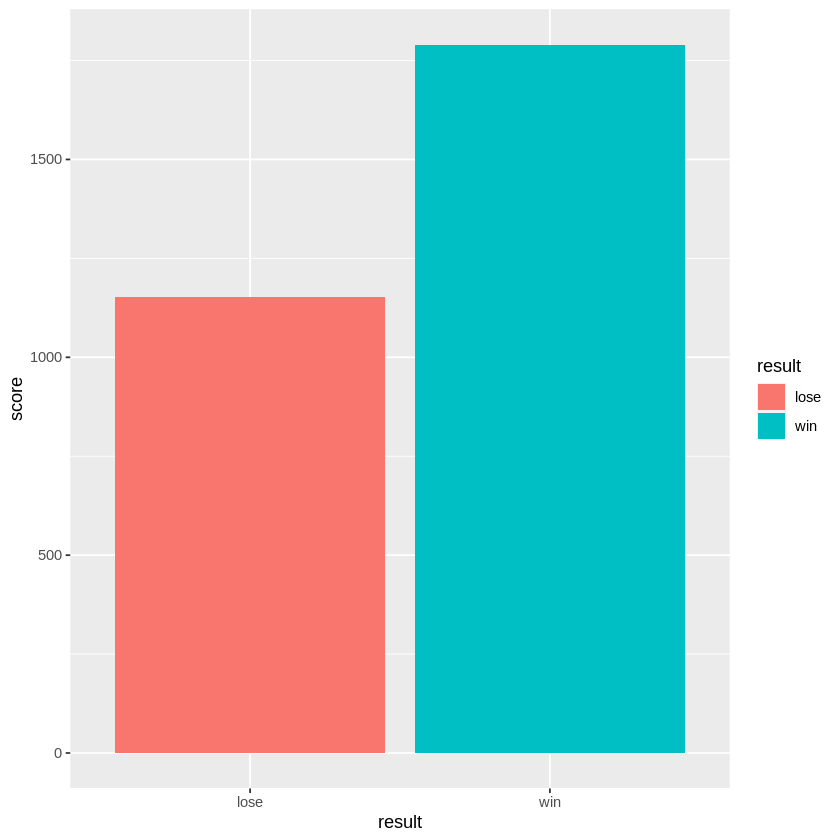

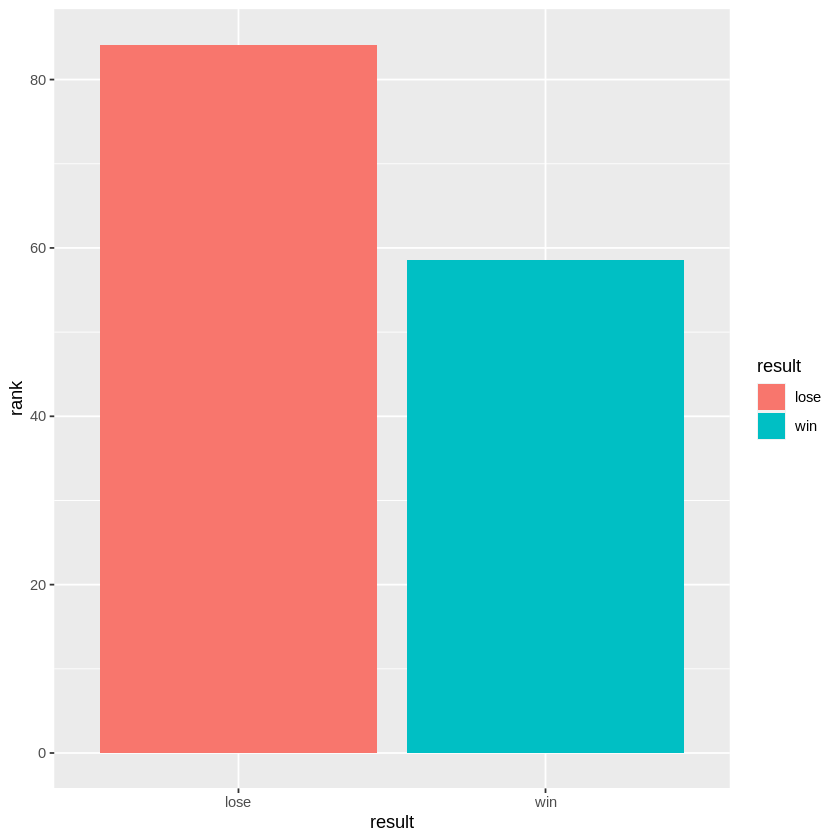

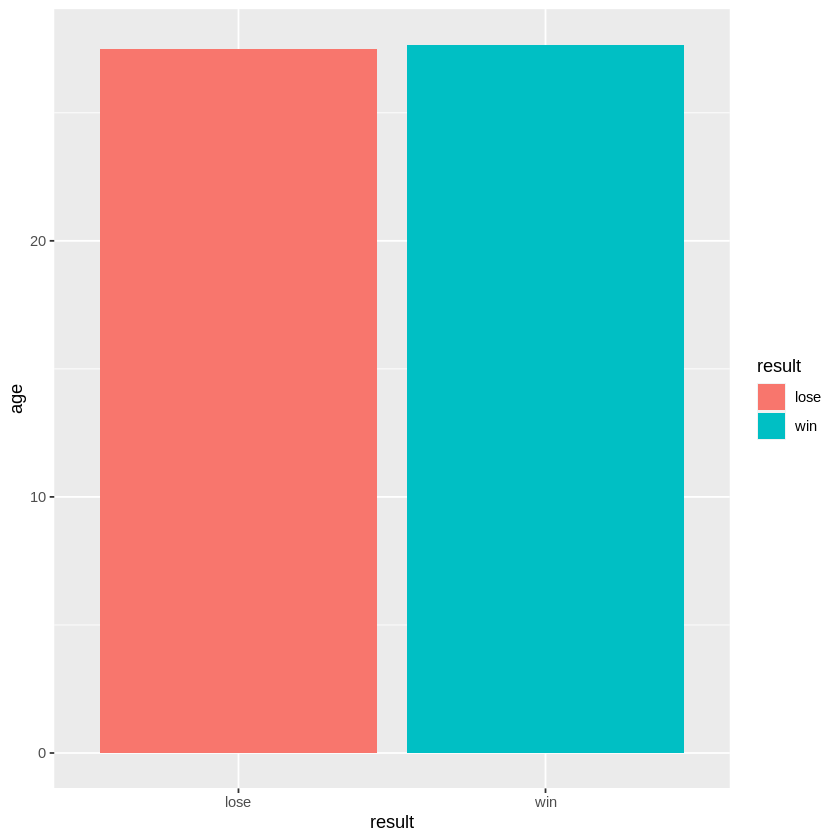

In [17]:
train_plot_1 <- ggplot(predictor_mean1, aes(x = result, y = points, fill = result)) +
                geom_bar(stat = "identity") +
                labs(x = "result", y = "score") 
train_plot_1

train_plot_2 <- ggplot(predictor_mean2, aes(x = result, y = rank, fill = result)) +
                geom_bar(stat = "identity") +
                labs(x = "result", y = "rank") 
train_plot_2

train_plot_3 <- ggplot(predictor_mean3, aes(x = result, y = age, fill = result)) +
                geom_bar(stat = "identity") +
                labs(x = "result", y = "age") 
train_plot_3
